In [1]:
# MNIST 1
import tensorflow

(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# 3D-Tenosr mit 60000 Samples, jeweilige Größe von 28x28 Pixel
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# scaler.fit(x_train)
# scaler.transform(x_train)

# scaler.fit(x_test)
# scaler.transform(x_test)

import numpy as np
x_train = x_train.astype("float64") / 255
x_test = x_test.astype("float64") / 255

import pandas as pd

## Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(784,)))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

# x_train Reshapen
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# y_train reshapen, damit verglichen werden kann
# z.B.: [ 5 ]           -> shape: (1,)
#       [ 0000010000 ]  -> shape: (10,)

# https://keras.io/api/utils/python_utils/#to_categorical-function
# Erstellt uns in Abhängigkeit von 'num_classes' (= Anzahl der Klassen, die es im Dataset gibt => siehe alle unique 
# Antworten in y_train) einen Vektor, bei welchem jede Stelle '1' ist, die die gewünscht Ziffer (0, 1, 2, ...) repräsentiert.

from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


model_history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3872 - accuracy: 0.8958 - val_loss: 0.2227 - val_accuracy: 0.9362
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1961 - accuracy: 0.9446 - val_loss: 0.1658 - val_accuracy: 0.9520
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1506 - accuracy: 0.9561 - val_loss: 0.1409 - val_accuracy: 0.9597
Epoch 4/10
469/469 [==

[0.8977000117301941, 0.9444666504859924, 0.9571666717529297, 0.9641333222389221, 0.9693499803543091, 0.9730333089828491, 0.9760500192642212, 0.9782833456993103, 0.9804166555404663, 0.98253333568573]


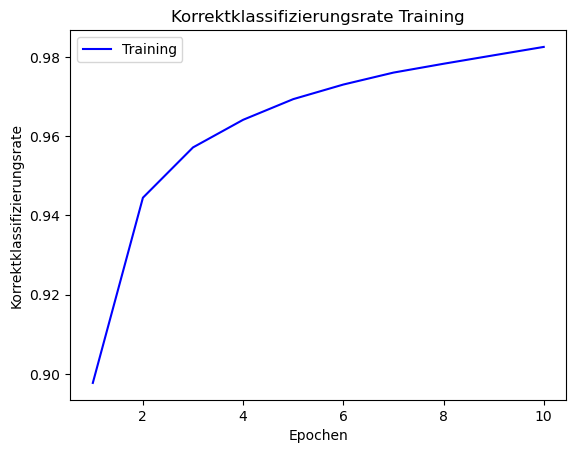

In [5]:
acc = model_history.history["accuracy"]
print(acc)
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, len(acc) + 1), acc, 'b', label="Training")
plt.title("Korrektklassifizierungsrate Training")
plt.xlabel("Epochen")
plt.ylabel("Korrektklassifizierungsrate")
plt.legend()
plt.show() 